In [2]:
# query vs bracket indexing

# create a datframe with 10k rows, then chech the times 
# then create one with 20k rows and so on
# save the results of every iteration in dataframe
# in the end analyze the differences

In [46]:
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [47]:
test_df = pd.DataFrame(columns = ["A", "B"])
results = pd.DataFrame(columns = ["query", "bracket"])

In [48]:
np.random.seed(123)
i = 1
while i <= 100:
    test_df_new = pd.DataFrame()
    test_df_new["A"] = np.random.randint(1, 100, 10000)
    test_df_new["B"] = np.random.randint(1, 100, 10000)
    test_df = pd.concat([test_df, test_df_new], axis = 0)
    
    results_new = pd.DataFrame()
    results_new["df_length_in_k"] = pd.Series(len(test_df))
    results_new["query"] = pd.Series(timeit.timeit('test_df.query("A > 50 & B > 50")', 
                                     number = 100, globals = globals()))
    results_new["bracket"] = pd.Series(timeit.timeit('test_df[(test_df["A"] > 50) \
                                                     & (test_df["B"] > 50)]', 
                                       number = 100, globals = globals()))
    
    results = pd.concat([results, results_new], axis = 0)
    
    i += 1

In [49]:
results["df_length_in_k"] = results["df_length_in_k"] / 1000
results["df_length_in_k"] = results["df_length_in_k"].astype("int")
results["differences"] = results["query"] - results["bracket"]
results["quotient"] = results["query"] / results["bracket"] - 1
results["q_MA"] = results["quotient"].rolling(10).mean()

,index,query,bracket,df_length_in_k,differences,quotient,q_MA
0,0,0.286306,0.135143,10,0.151163,1.118538,NaN
1,0,0.404875,0.237688,20,0.167187,0.703388,NaN
2,0,0.498863,0.333805,30,0.165057,0.494472,NaN
3,0,0.589680,0.438430,40,0.151250,0.344982,NaN
4,0,0.700345,0.538320,50,0.162025,0.300982,NaN
...,...,...,...,...,...,...,...
95,0,10.071608,9.533270,960,0.538338,0.056469,0.059895
96,0,10.223550,9.675069,970,0.548481,0.056690,0.060146
97,0,10.282849,9.767582,980,0.515266,0.052753,0.059326
98,0,10.336166,9.846227,990,0.489939,0.049759,0.057839


In [50]:
print(results)

        query   bracket  df_length_in_k  differences  quotient      q_MA
0    0.286306  0.135143              10     0.151163  1.118538       NaN
0    0.404875  0.237688              20     0.167187  0.703388       NaN
0    0.498863  0.333805              30     0.165057  0.494472       NaN
0    0.589680  0.438430              40     0.151250  0.344982       NaN
0    0.700345  0.538320              50     0.162025  0.300982       NaN
..        ...       ...             ...          ...       ...       ...
0   10.071608  9.533270             960     0.538338  0.056469  0.059895
0   10.223550  9.675069             970     0.548481  0.056690  0.060146
0   10.282849  9.767582             980     0.515266  0.052753  0.059326
0   10.336166  9.846227             990     0.489939  0.049759  0.057839
0   10.520226  9.905148            1000     0.615079  0.062097  0.057042

[100 rows x 6 columns]


Text(313.26767676767673, 0.5, 'Avg time to compute query in seconds')

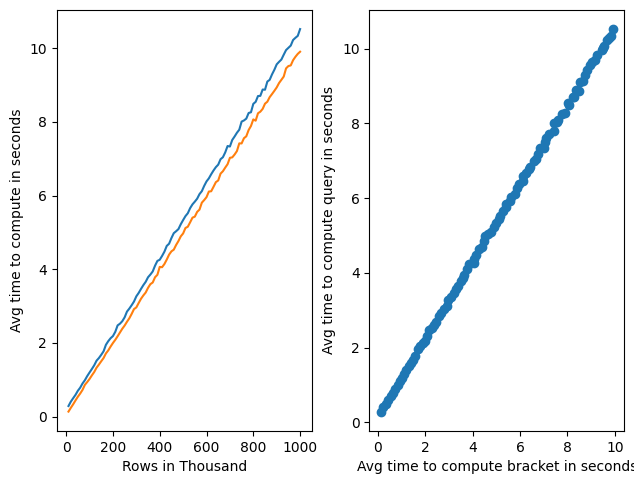

In [51]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
ax[0].plot(results["df_length_in_k"], results["query"])
ax[0].plot(results["df_length_in_k"], results["bracket"])
ax[0].set_xlabel("Rows in Thousand")
ax[0].set_ylabel("Avg time to compute in seconds")
ax[1].scatter(results["bracket"], results["query"])
ax[1].set_xlabel("Avg time to compute bracket in seconds")
ax[1].set_ylabel("Avg time to compute query in seconds")

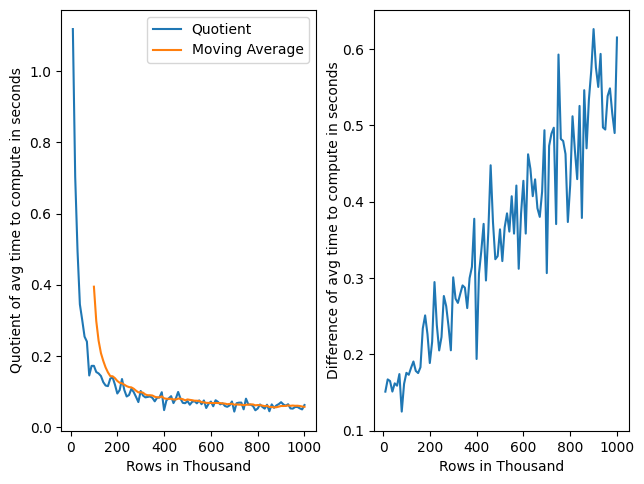

In [52]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
ax[0].plot(results["df_length_in_k"], results["quotient"], label = "Quotient")
ax[0].plot(results["df_length_in_k"], results["q_MA"], label = "Moving Average")
ax[0].set_xlabel("Rows in Thousand")
ax[0].set_ylabel("Quotient of avg time to compute in seconds")
ax[0].legend()
ax[1].plot(results["df_length_in_k"], results["differences"])
ax[1].set_xlabel("Rows in Thousand")
ax[1].set_ylabel("Difference of avg time to compute in seconds")
ax[1].yaxis.set_label_coords(-0.13, 0.5)

In [67]:
results[results["df_length_in_k"].isin(np.arange(0, 1001, 50))]["q_MA"]

0         NaN
0    0.394643
0    0.167658
0    0.129753
0    0.112457
0    0.098246
0    0.088832
0    0.080933
0    0.077493
0    0.077843
0    0.073618
0    0.067907
0    0.066642
0    0.062932
0    0.062803
0    0.062070
0    0.056578
0    0.059362
0    0.060636
0    0.057042
Name: q_MA, dtype: float64